Matplotlib is building the font cache; this may take a moment.


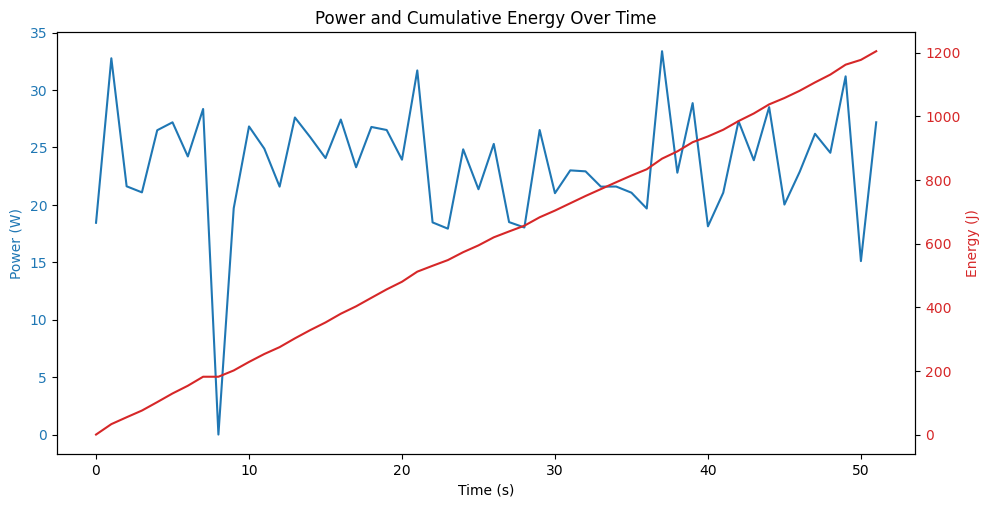

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def main():
    df = get_data("experiment_data_messy.csv")
    plot_data(df)

def get_data(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Rename columns
    df.rename(columns={
        " Time (seconds) ": "Time (seconds)",
        "Voltage [V]": "Voltage (V)",
        "Current(A)": "Current (A)",
        "Temp °C": "Temp (°C)"
    }, inplace=True)

    # Drop extra column
    df.drop(df.columns[-1], axis=1, inplace=True)

    # Fix the last time (5) to (51)
    df["Time (seconds)"] = df.index

    # Convert to numeric, invalid entries become NaN
    numeric_cols = ["Time (seconds)", "Voltage (V)", "Current (A)", "Temp (°C)"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Fill NaN with mean (Voltage, Current) or median (Temperature)
    df["Voltage (V)"]=df["Voltage (V)"].fillna(df["Voltage (V)"].mean())
    df["Current (A)"]=df["Current (A)"].fillna(df["Current (A)"].mean())
    df["Temp (°C)"]=df["Temp (°C)"].fillna(df["Temp (°C)"].median())

    # Correct negative values
    df["Current (A)"] = df["Current (A)"].clip(lower=0)
    df["Temp (°C)"] = df["Temp (°C)"].clip(lower=0)

    # Compute Power and cumulative Energy
    df["Power (W)"] = df["Voltage (V)"] * df["Current (A)"]
    df["Energy (J)"] = (df["Power (W)"] * df["Time (seconds)"].diff().fillna(0)).cumsum()

    return df

def plot_data(df):
    # Plot Power and Energy vs Time
    fig, ax1 = plt.subplots(figsize=(10,5))

    ax1.plot(df["Time (seconds)"], df["Power (W)"], color='tab:blue', label='Power (W)')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Power (W)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # second y-axis
    ax2.plot(df["Time (seconds)"], df["Energy (J)"], color='tab:red', label='Energy (J)')
    ax2.set_ylabel("Energy (J)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title("Power and Cumulative Energy Over Time")
    plt.show()

if __name__ == "__main__":
    main()

